In [2]:
#all needed packages 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles, venn3_unweighted
from itertools import product
import numpy as np
import seaborn as sns
sns.set_theme(palette='colorblind')


# Import prepared output files: Feelnc, CNCI, CPAT

In [3]:
# Import Feelnc data
df_feelnc = pd.read_csv('/home/maggy/LncRNA/6_identify_common_lncRNA/6_1_feelnc_output/feelnc_lncRNA.csv', sep=',') # name

# Import CNCI data
df_cnci = pd.read_csv('/home/maggy/LncRNA/6_identify_common_lncRNA/6_2_cnci_output/cnci_lncRNA.csv', sep='\t') # gene_id

# Import CPAT data
df_cpat = pd.read_csv('/home/maggy/LncRNA/6_identify_common_lncRNA/6_3_cpat_output/cpat_lncRNA.csv', sep='\t') # gene_id

# Import CPC2 data 
df_cpc2 = pd.read_csv('/home/maggy/LncRNA/6_identify_common_lncRNA/6_4_cpc2_output/cpc2_lncRNA.csv', sep='\t') # ID

In [4]:
# CHECK IF DF CONTAIN DUPLICATES
# FEELNC
if df_feelnc['name'].duplicated().any():
    print("Feelnc contains duplicates in the name column")
else:
    print("Feelnc does not contain duplicates in the name column")
# CNCI
if df_cnci['Transcript ID'].duplicated().any():
    print("cnci contains duplicates in the name column")
else:
    print("cnci does not contain duplicates in the name column")
# CPAT
if df_cpat['transcript_id'].duplicated().any():
    print("cpat contains duplicates in the name column")
else:
    print("cpat does not contain duplicates in the name column")
# CPC2
if df_cpc2['#ID'].duplicated().any():
    print("cpc2 contains duplicates in the name column")
else:
    print("cpc2 does not contain duplicates in the name column")

Feelnc does not contain duplicates in the name column
cnci does not contain duplicates in the name column
cpat does not contain duplicates in the name column
cpc2 does not contain duplicates in the name column


In [5]:
# REMOVE DUPLICATES 
# FEELNC
# does not contain any duplicates 
# CNCI
#df_cnci = df_cnci.drop_duplicates(subset='transcript_id', keep='first')
# CPAT
# does not contain any duplicates 
# CPC2s
# does not contain any duplicates 

# Dataset analysis of extracted data 

In [6]:
# calculating overlap
feelnc = set(df_feelnc['name'])
cnci = set(df_cnci['Transcript ID'])
cpat = set(df_cpat['transcript_id'])
cpc = set(df_cpc2['#ID'])

# COMMON (all) 
common_genes = feelnc.intersection(cnci, cpat, cpc)
print("Number of common genes: ", len(common_genes))

# TWO in common
feelnc_cnci_genes = feelnc.intersection(cnci)
print("Number of genes in common between feelnc and cnci: ", len(feelnc_cnci_genes))
feelnc_cpat_genes = feelnc.intersection(cpat)
print("Number of genes in common between feelnc and cpat: ", len(feelnc_cpat_genes))
feelnc_cpc_genes = feelnc.intersection(cpc)
print("Number of genes in common between feelnc and cpc: ", len(feelnc_cpc_genes))
cnci_cpat_genes = cnci.intersection(cpat)
print("Number of genes in common between cnci and cpat: ", len(cnci_cpat_genes))
cnci_cpc_genes = cnci.intersection(cpc)
print("Number of genes in common between cnci and cpc: ", len(cnci_cpc_genes))
cpat_cpc_genes = cpat.intersection(cpc)
print("Number of genes in common between cpat and cpc: ", len(cpat_cpc_genes))


# THREE in common
feelnc_cnci_cpat_genes = feelnc.intersection(cnci, cpat)
print("Number of genes in common between feelnc, cnci and cpat: ", len(feelnc_cnci_cpat_genes))
feelnc_cnci_cpc_genes = feelnc.intersection(cnci, cpc)
print("Number of genes in common between feelnc, cnci and cpc: ", len(feelnc_cnci_cpc_genes))
feelnc_cpat_cpc_genes = feelnc.intersection(cpat, cpc)
print("Number of genes in common between feelnc, cpat and cpc: ", len(feelnc_cpat_cpc_genes))
cnci_cpat_cpc_genes = cnci.intersection(cpat, cpc)
print("Number of genes in common between cnci, cpat and cpc: ", len(cnci_cpat_cpc_genes))


Number of common genes:  33882
Number of genes in common between feelnc and cnci:  46222
Number of genes in common between feelnc and cpat:  36965
Number of genes in common between feelnc and cpc:  44351
Number of genes in common between cnci and cpat:  39155
Number of genes in common between cnci and cpc:  47212
Number of genes in common between cpat and cpc:  41893
Number of genes in common between feelnc, cnci and cpat:  34602
Number of genes in common between feelnc, cnci and cpc:  40991
Number of genes in common between feelnc, cpat and cpc:  36036
Number of genes in common between cnci, cpat and cpc:  38180


# Venn diagram

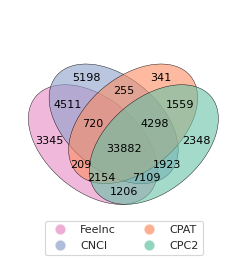

In [23]:
from venn import venn
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn theme
sns.set_theme(palette='Set2', style='whitegrid', context='paper', 
              rc={'axes.labelsize': 8, 'xtick.labelsize': 8, 
                  'ytick.labelsize': 8, 'legend.fontsize': 8, 
                  'legend.title_fontsize': 8})

# Get the first 4 colors from the 'Set2' palette and reorder them
set2 = sns.color_palette("Set2", n_colors=4)
custom_order = [3,2,1,0]  # Green, Pink, Blue, Orange

# Get corresponding colors in the custom order
reordered_colors = [set2[i] for i in custom_order]

# Set names
set_labels = ['Feelnc', 'CNCI', 'CPAT', 'CPC2']

# Create the figure and axis
fig, ax = plt.subplots(figsize=((7/2.54), (7/2.54)))

# Create the Venn diagram
g = venn({
    "Feelnc": set(df_feelnc['name']),
    "CNCI": set(df_cnci['Transcript ID']),
    "CPAT": set(df_cpat['transcript_id']),
    "CPC2": set(df_cpc2['#ID'])
}, cmap='tab10', fontsize=8, ax=ax)

# Manually set the colors of the sets and ensure they are semi-transparent
line_width = 0.3  # Define the desired linewidth
for i, patch in enumerate(g.patches):
    if patch:  # Check if the patch exists
        color = reordered_colors[i % len(reordered_colors)]
        patch.set_facecolor((*color, 0.6))  # 0.7 sets the transparency level
        patch.set_edgecolor('black')  # Set edge color to black
        patch.set_linewidth(line_width)  # Set the desired linewidth

# Create custom legend with matching colors
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=set_labels[i], 
                             markersize=8, markerfacecolor=(*reordered_colors[i], 0.7)) 
                  for i in range(len(reordered_colors))]

# Place legend below the Venn diagram
ax.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=2)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('venn_diagram_lncrna.png', dpi=500)
plt.savefig('venn_diagram_lncrna.svg')
plt.show()


# Export of data for differential expression analysis 

In [8]:

# export common genes as tsv file
common_genes = pd.DataFrame(common_genes)
common_genes.rename(columns={0: 'gene_id'}, inplace=True)
common_genes.to_csv('common_lncrna.tsv', sep='\t', index=False, header=False)
common_genes

,gene_id
0,strg.62542.4
1,strg.64982.1
2,strg.2743.1
3,strg.75864.2
4,strg.32377.1
...,...
33877,strg.81698.1
33878,strg.43110.1
33879,strg.1242.2
33880,strg.19933.2


## Venn diagram FOR THREE CONDITIONS 

In [9]:
# venn_values = pd.Series({'cnci_cpat': len(cnci_cpat_genes), 'cpat_feelnc': len(feelnc_cpat_genes), 'cnci_feelnc': len(feelnc_cnci_genes), 'common': len(common_genes)})
# venn_values = venn_values.sort_values(ascending=False)
# venn_values

In [10]:
# # CREATE VENN DIAGRAM
# plt.figure(figsize=(6, 4))
# v = venn3_unweighted(subsets=(len(cpat_only), len(feelnc_only), len(feelnc_cpat_genes), len(cnci_only), len(cnci_cpat_genes), len(feelnc_cnci_genes), len(common_genes)),
#       set_labels=('CPAT', 'FEELnc', 'CNCI'))
# # set plot title
# plt.title("Identified lncRNA")
# # total number of transcripts identified by Feelnc
# plt.annotate(len(df_feelnc['name']), xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(+220,+10),
#              ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1))
# # total number of transcripts identified by CNCI 
# plt.annotate(len(df_cnci['gene_id']), xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(+140,-145),
#              ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1))
# # total number of transcripts identified by CPAT
# plt.annotate(len(df_cpat['gene_id']), xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,+10),
#              ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1))
# # export the plot
# plt.savefig('venn_diagram_lncrna.pdf', dpi=600)
# plt.savefig('venn_diagram_lncrna.svg', dpi=600)
# plt.show()